In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

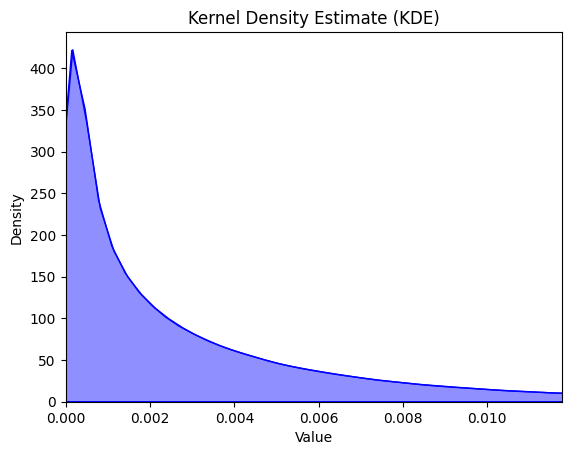

In [56]:
N = 1000000

y = 100
mu_underlying = 0.0
sigma_underlying = 0.01
T = 100

def underlying_to_param_1(mu, sigma, T):
    param = (mu - np.square(sigma) / 2)*T
    return param

def underlying_to_param_2(sigma, T):
    param = np.square(sigma)*T
    return param

param_1 = underlying_to_param_1(mu_underlying, sigma_underlying, T)
param_2 = underlying_to_param_2(sigma_underlying, T)

r = np.random.lognormal(mean=param_1, sigma=param_2, size=N)
r_prim = np.random.lognormal(mean=param_1, sigma=param_2, size=N)

def P(r, y):
    profit = y*np.square(np.sqrt(r) - 1)
    return profit

profit_1 = P(r, y)
profit_2 = P(r_prim, y)

sns.kdeplot(profit_1, fill=True, color="blue")
sns.kdeplot(profit_2, fill=True, color="blue")
plt.title("Kernel Density Estimate (KDE)")
plt.xlim([np.percentile(profit_1, 0), np.percentile(profit_1, 95)])
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

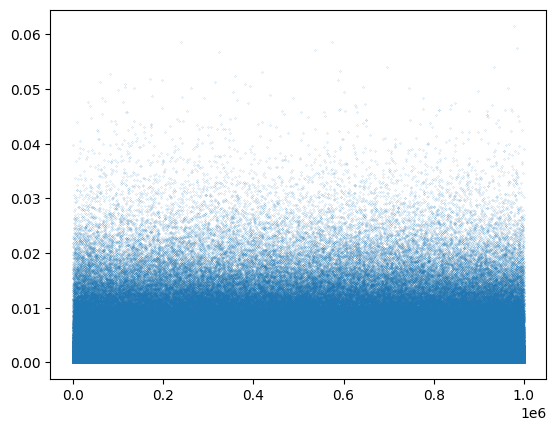

In [57]:
plt.scatter(np.arange(len(profit_1)), profit_1, s=0.01)